In [58]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [59]:
df = pd.read_csv('PrizePicksData.csv')
df

,points,current_seed,opponent_seed,court,avg,fg_avg,mins,allstar_opponent
0,23,0,0,0,28.400000,31.800000,38,0
1,25,1,-1,0,23.000000,31.800000,37,0
2,28,2,0,0,24.000000,30.500000,33,0
3,35,0,1,1,26.000000,33.250000,38,0
4,36,1,0,1,30.500000,38.075000,30,0
5,42,2,3,1,33.250000,49.037500,36,1
6,14,1,1,1,37.625000,47.968750,32,0
7,17,0,4,1,25.812500,35.534375,28,1
8,34,1,3,0,21.406250,33.667187,42,1
9,22,3,1,0,27.703125,34.133594,36,0


In [60]:
reg = linear_model.LinearRegression()
reg.fit(df[['current_seed','opponent_seed','court', 'avg', 'fg_avg', 'mins','allstar_opponent']], df.points)

LinearRegression()

In [62]:
reg.predict([[-5,2,1,28.41848388,49.61521819,47.24571429,1]])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30.61981802])

    points  current_seed  opponent_seed  court        avg     fg_avg  mins  \
0       23             0              0      0  28.400000  31.800000    38   
1       25             1             -1      0  23.000000  31.800000    37   
2       28             2              0      0  24.000000  30.500000    33   
3       35             0              1      1  26.000000  33.250000    38   
4       36             1              0      1  30.500000  38.075000    30   
5       42             2              3      1  33.250000  49.037500    36   
6       14             1              1      1  37.625000  47.968750    32   
7       17             0              4      1  25.812500  35.534375    28   
8       34             1              3      0  21.406250  33.667187    42   
9       22             3              1      0  27.703125  34.133594    36   
10      26             2              1      0  24.851562  34.916797    33   
11      27             1             -2      1  25.425781  34.10

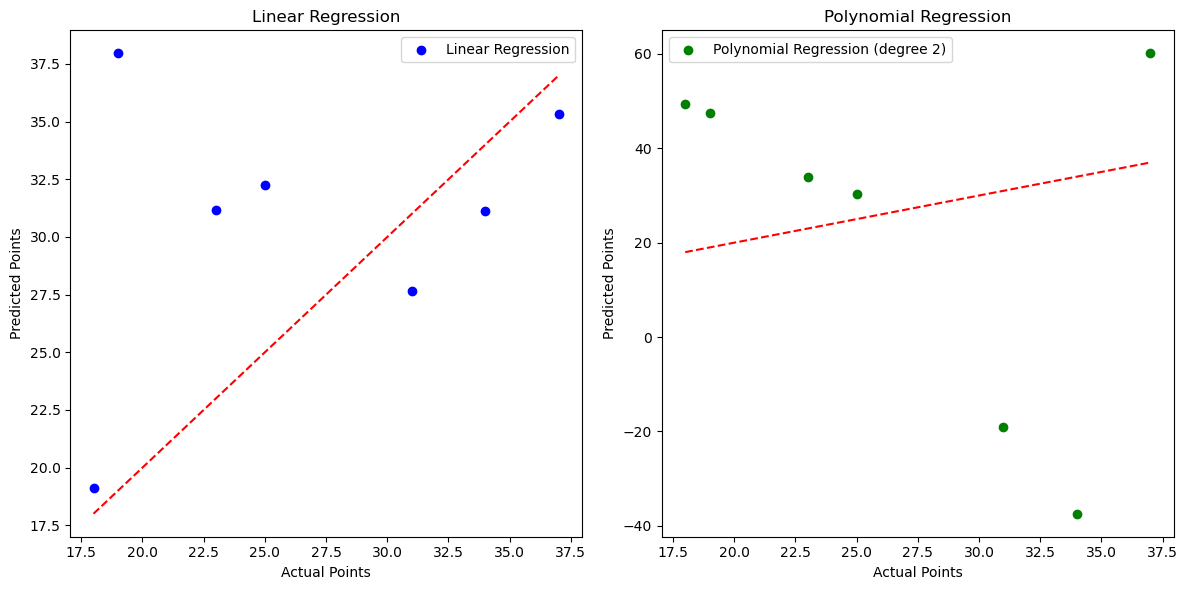

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
data = pd.read_csv('PrizePicksData.csv')

print(data)

# Define the features and target variable
features = data[['current_seed', 'opponent_seed', 'court', 'avg', 'fg_avg', 'mins', 'allstar_opponent']]
target = data['points']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

# Polynomial Regression Model (degree 2)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_pred = poly_model.predict(X_test_poly)

# Evaluate both models
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_rmse = np.sqrt(linear_mse)

poly_mae = mean_absolute_error(y_test, poly_pred)
poly_mse = mean_squared_error(y_test, poly_pred)
poly_rmse = np.sqrt(poly_mse)

# Print the results
print(f'Linear Regression - MAE: {linear_mae}, MSE: {linear_mse}, RMSE: {linear_rmse}')
print(f'Polynomial Regression (degree 2) - MAE: {poly_mae}, MSE: {poly_mse}, RMSE: {poly_rmse}')

# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, linear_pred, color='blue', label='Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Linear Regression')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, poly_pred, color='green', label='Polynomial Regression (degree 2)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Polynomial Regression')
plt.legend()

plt.tight_layout()
plt.show()


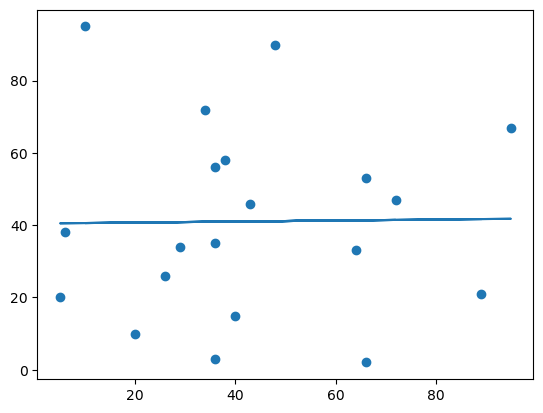

0.01331814154297491


In [1]:
import matplotlib.pyplot as plt
from scipy import stats

x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()
print(r)